# Fashion MNIST Dataset

## Import module

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
print(tf.__version__)

2.6.0


## Import dataset


In [115]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explore dataset

In [ ]:
# Show the first training example
print(f"Training sample:  \n{train_images[0]}\n")
print(f"Training label: \n{train_labels[0]}")

In [117]:
# Check the shape of our data
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [118]:
# Check the shape of single example
train_images[0].shape, train_labels[0].shape

((28, 28), ())

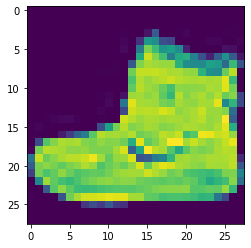

In [119]:
# Plot a single number
plt.imshow(train_images[0])

In [71]:
# Check out samples model
train_labels[0]

9

In [72]:
# Create a small list of the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes?
len(class_names)               

10

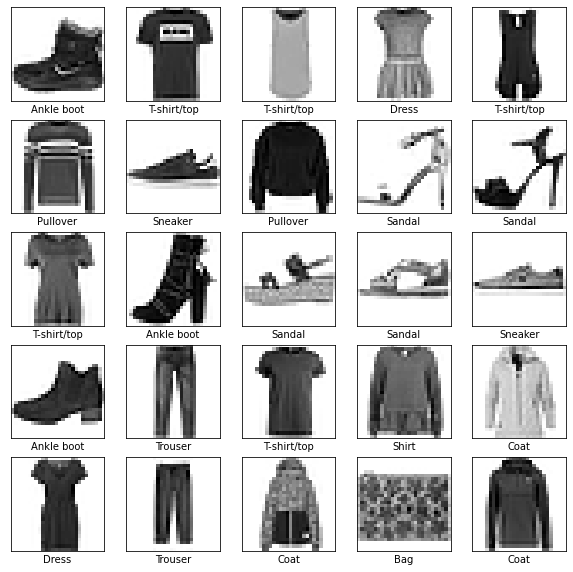

In [120]:
# Plot 25 examples image and its label
plt.figure(figsize=(10, 10))
for i in range(25): 
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[(train_labels[i])])
  plt.grid(False)
plt.show() 

## Normalize the training set

In [121]:
# Divide training, test images by the maximum values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check the min, max
train_images.min(), train_images.max()

(0.0, 1.0)

## Build a model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Convert from 2 dimensional array(28x28) to one-dimensional (28*28)
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # Softmax for multiclass-classification problem                            
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=),
              metrics=["accuracy"])

# 3. Fit the model
norm_history = model.fit(train_images,
                         train_labels,
                         epochs=10)



In [123]:
## Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nTest Accuracy: {test_acc*100:.2f}%")

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 0s - loss: 0.3327 - accuracy: 0.8848

Test Accuracy: 88.48%


In [124]:
# Make predictions
predictions = model.predict(test_images)

In [97]:
predictions[0]

array([5.0679844e-08, 1.7660163e-09, 6.2008998e-09, 1.0272205e-12,
       5.0715770e-10, 2.2530148e-02, 6.2865690e-10, 1.5439151e-03,
       2.2739735e-08, 9.7592586e-01], dtype=float32)

In [100]:
# Compare prediction to ground truth value
np.argmax(predictions[0]) == test_labels[0]

True

Grapth this to look at the full set of 10 class predictions

In [135]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions

With the model trained, you can use it to make predictions about some images.

:ets look at th 0th image, predictions, and prediction array.

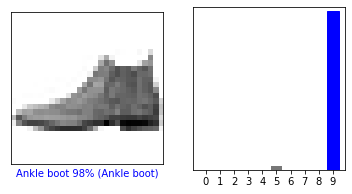

In [136]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

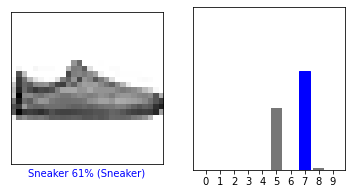

In [137]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


Let's plot several images with their predictions. Note that the model can be wrong even when very confident`

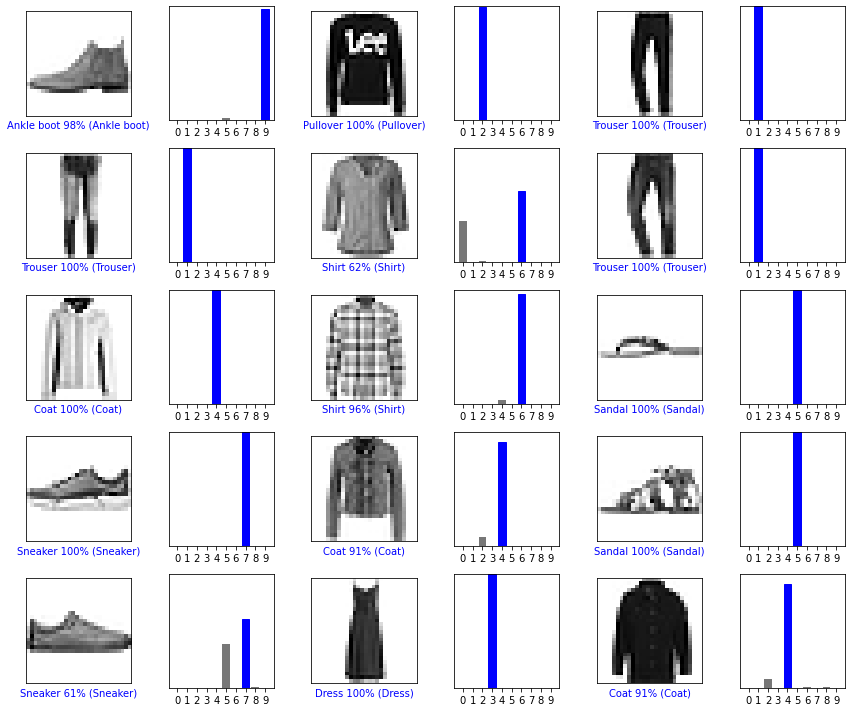

In [141]:
# Plot the first X images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images): # range(15)
  plt.subplot(num_rows, 2*num_cols, 2*i+1) # Plot Predicted images luon la so le
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2) # Plot Value array
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show();


## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [142]:
# Grab an image from the test dataset
img = test_images[1]

img.shape

(28, 28)

`tf.keras` models are optimized to make predictions on a *batch*, or collection of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [143]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

img.shape

(1, 28, 28)

Now predict the correct label for this image

In [144]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0514525e-04 2.8310542e-12 9.9873251e-01 2.3599331e-11 8.2573917e-04
  1.2876695e-12 1.3661732e-04 1.2508419e-17 1.2132508e-09 3.1793855e-13]]


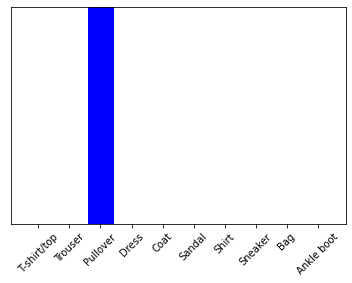

In [147]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [149]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

## Visualize confusion matrix

In [ ]:
# Make predictions with the most recent model
y_probs = model.predict(test_images)

y_probs[:5]

In [174]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [175]:
# Convert all of predictions from probabilities to label
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# # A normal confusion matrix
# cm = confusion_matrix(test_labels, y_preds)

# # Normalize it
# cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
# cm_norm

# fig,ax = plt.subplots(figsize=(10,10))
# ax.matshow(cm, cmap=plt.cm.Blues)

In [194]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

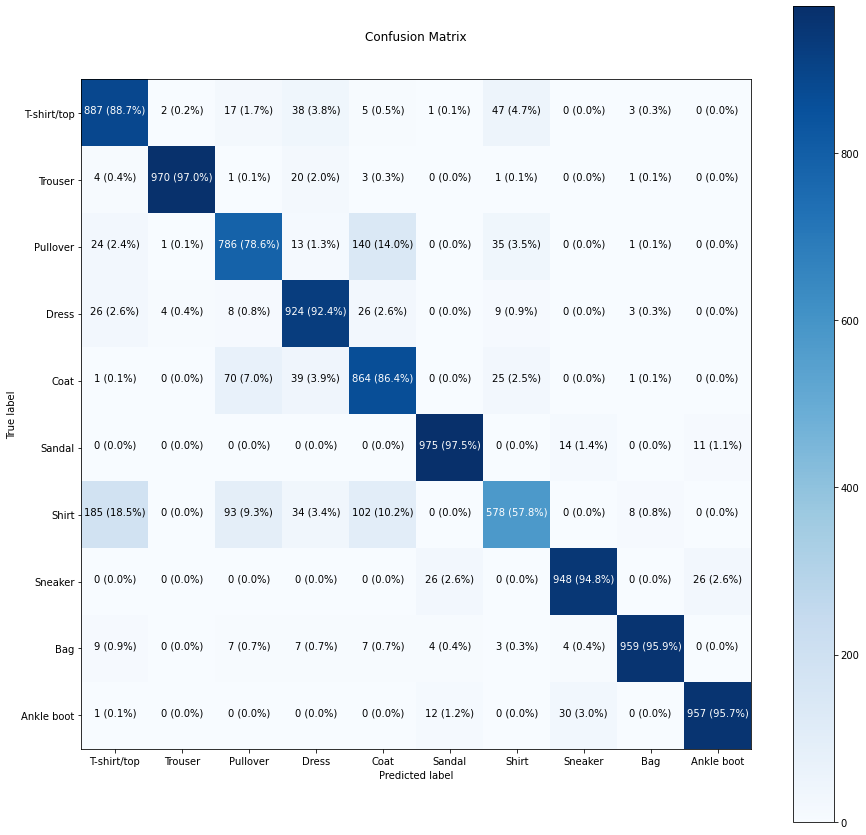

In [195]:
make_confusion_matrix(test_labels,
                     y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)